In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from LoadData import load_data
from sklearn.model_selection import train_test_split

seq_len = 16
X, Y = load_data(sequence_len=seq_len)

# 5. Разделение на тренировочные и тестовые данные
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [3]:
Y.shape

(35024, 16, 1)

In [4]:
from RecurentNeuralNetwork import RecurentNeuralNetwork
from RecurrentLayerTypes import RecurrentLayerTypes

epoch = 20
arch = [X.shape[2], 16, 1]
rnn = RecurentNeuralNetwork(arch, RecurrentLayerTypes.RNNSIMPLE, seq_len , 6e-3)

In [5]:
loss = rnn.fit(X_train, y_train, epoch_count=epoch)

100%|██████████| 20/20 [00:43<00:00,  2.19s/it]


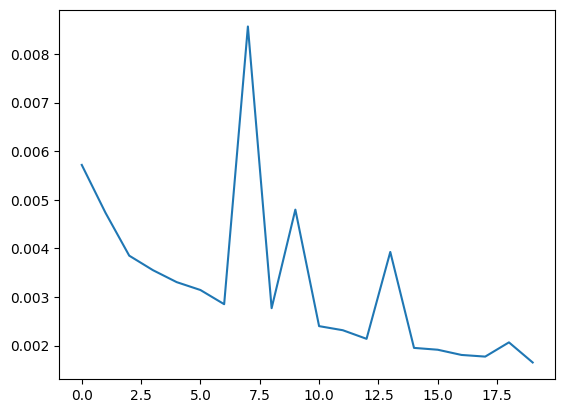

loss[-1]=0.0016512172652026061


In [6]:
plt.plot(loss)
plt.show()
print(f"loss[-1]={loss[-1]}")

In [7]:
test_predict = rnn.forward(X_test)

mse: 0.0016449320354816567, mse[-1]: 0.001465310924061977


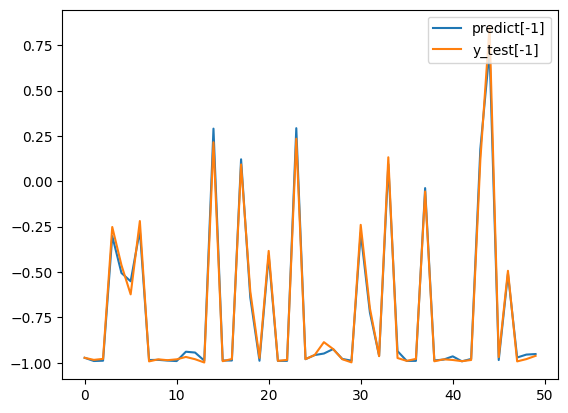

In [8]:
from Functions import mse
print(f"mse: {mse(test_predict, y_test)}, mse[-1]: {mse(test_predict[:,-1], y_test[:, -1])}")
a = 150
b = 50
plt.plot(test_predict[a:a+b,-1], label="predict[-1]")
plt.plot(y_test[a:a+b, -1], label="y_test[-1]")
plt.legend(loc='upper right')
plt.show()

In [9]:
# epoch = 20
# arch = [X.shape[2], 16, 1]
gru = RecurentNeuralNetwork(arch, RecurrentLayerTypes.GRU, seq_len , 12e-3)

In [10]:
loss_gru = gru.fit(X_train, y_train, epoch_count=epoch)

100%|██████████| 20/20 [02:31<00:00,  7.59s/it]


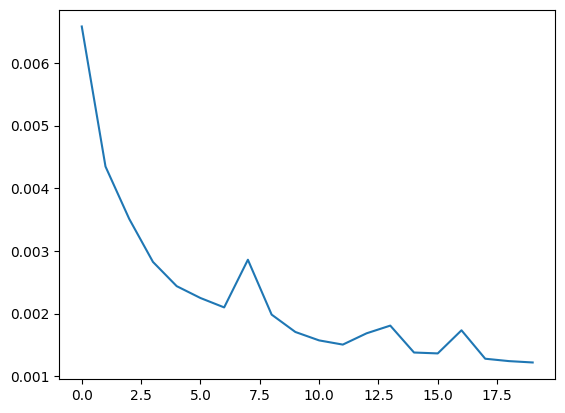

loss[-1]=0.0012188017927208387


In [11]:
plt.plot(loss_gru)
plt.show()
print(f"loss[-1]={loss_gru[-1]}")

In [12]:
test_predict_gru = gru.forward(X_test)

mse: 0.0012135140784023163, mse[-1]: 0.0010902994114544702


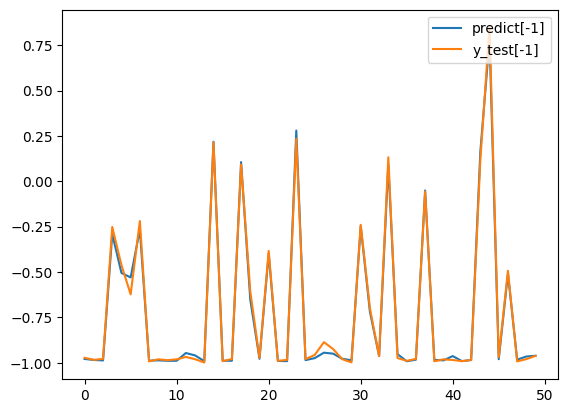

In [13]:
print(f"mse: {mse(test_predict_gru, y_test)}, mse[-1]: {mse(test_predict_gru[:,-1], y_test[:, -1])}")
a = 150
b = 50
plt.plot(test_predict_gru[a:a+b,-1], label="predict[-1]")
plt.plot(y_test[a:a+b, -1], label="y_test[-1]")
plt.legend(loc='upper right')
plt.show()

In [14]:
# epoch = 20
# arch = [X.shape[2], 16, 1]
lstm = RecurentNeuralNetwork(arch, RecurrentLayerTypes.LSTM, seq_len , 24e-3)

In [15]:
loss_lstm = lstm.fit(X_train, y_train, epoch_count=epoch)

100%|██████████| 20/20 [03:40<00:00, 11.02s/it]


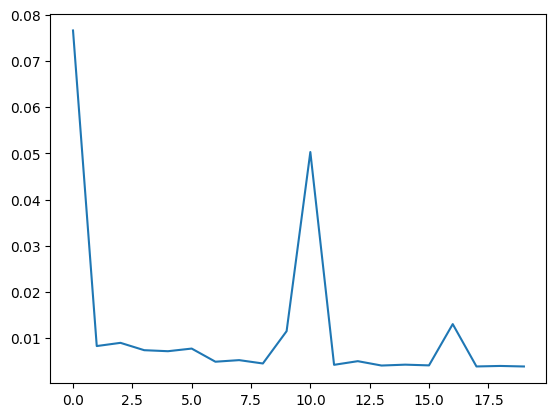

loss[-1]=0.003865875531304882


In [16]:
plt.plot(loss_lstm)
plt.show()
print(f"loss[-1]={loss_lstm[-1]}")

In [17]:
test_predict_lstm = lstm.forward(X_test)

mse: 0.0037830892087465924, mse[-1]: 0.0016347659135234156


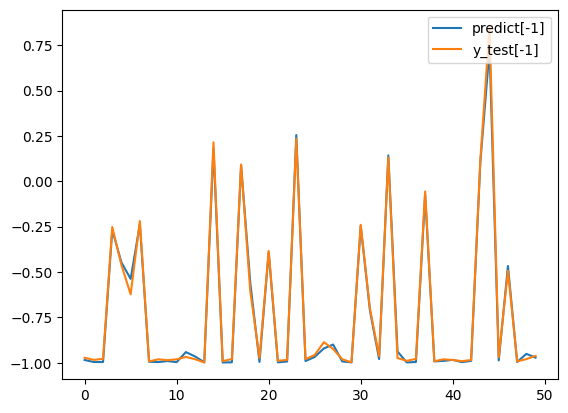

In [18]:
print(f"mse: {mse(test_predict_lstm, y_test)}, mse[-1]: {mse(test_predict_lstm[:,-1], y_test[:, -1])}")
a = 150
b = 50
plt.plot(test_predict_lstm[a:a+b,-1], label="predict[-1]")
plt.plot(y_test[a:a+b, -1], label="y_test[-1]")
plt.legend(loc='upper right')
plt.show()